# Светлинская ГЭС-3, генератор ГГ-1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
k_scale=1
plt.rcParams['figure.figsize'] = [19*k_scale, 6*k_scale]

In [3]:
# Вводные данные для анализа
# Номинальная мощность генераторов, МВт:
Pnom=107

# Импорт и форматирование csv с основными данными
df_main = pd.read_csv('Svet_main_data.csv', sep=';', encoding="ansi", decimal=',', skiprows=1050)
df_main.columns = ["TimeUTC", 
                 "G1_Fa", "G1_U1", "G1_P", "G1_Q", "G1_If","G1_Uf",
                 "G2_Fa", "G2_U1", "G2_P", "G2_Q", "G2_If","G2_Uf",
                 "G3_Fa", "G3_U1", "G3_P", "G3_Q", "G3_If","G3_Uf",]
# Преобразовываем столбец с датами в datetime
df_main['TimeUTC'] = pd.to_datetime(df_main['TimeUTC'], dayfirst=True)
# Создаем маску для фильтрации строк, где миллисекунды равны нулю
mask = df_main['TimeUTC'].dt.microsecond == 0
# Применяем маску к DataFrame, чтобы отфильтровать нужные строки
df_main = df_main[mask]

# Импорт и форматирование csv Поиска СК
df_sk = pd.read_csv('Svet_results_data.csv', sep=';', encoding="ansi", decimal=',')
df_sk.columns = ["TimeUTC", 
                 "G1_def", "G1_def_P", "G1_def_Q", "G1_def_P_amp", "G1_def_P_freq","G1_def_Q_amp", "G1_def_Q_freq",
                 "G2_def", "G2_def_P", "G2_def_Q", "G2_def_P_amp", "G2_def_P_freq","G2_def_Q_amp", "G2_def_Q_freq",
                 "G3_def", "G3_def_P", "G3_def_Q", "G3_def_P_amp", "G3_def_P_freq","G3_def_Q_amp", "G3_def_Q_freq"]
df_sk["time"] = ((pd.to_datetime(df_sk["TimeUTC"], dayfirst=True).astype('int64') / 1e6 - float(pd.to_datetime(df_sk["TimeUTC"][0], dayfirst=True).to_datetime64()) / 1e6).astype('int64')) / 1e3
# Импорт и форматирование csv СМСР
df_ext_SMSR = pd.read_csv('./Svet1/SMSR_SIG_EXT_data_Svet_1.csv', sep=';', encoding="windows-1251")
# Создаем таблицу diagno с выводом ошибок алгоритма СМСР (берем часть колонок из df_ext)
diagno_SMSR = df_ext_SMSR[["osh_ARV1_ext[6]", "osh_ARV1_ext[7]", "osh_ARV1_ext[8]", "osh_ARV1_ext[9]", "osh_ARV1_ext[10]"]]
diagno_SMSR.columns = ["bug1", "bug2", "bug3", "bug4", "bug5"]
# Создаем таблицу result_osc для вывода расчетов типов данных алгоритма СМСР (берем часть колонок из df_ext)
results_SMSR = df_ext_SMSR[["osh_ARV1_ext[{:d}]".format(i) for i in range(11, 25)]]
results_SMSR.columns = ["osc1_f", "osc1_phi", "osc1_np", "osc2_f", "osc2_phi", "osc2_np", "osc3_f", "osc3_phi", "osc3_np", "osc4_f", "osc4_phi", "osc4_np", "osc5_f", "osc5_amp"]
# Создаем таблицу osh для вывода выходных сигналов алгоритма СМСР (берем часть колонок из df_ext)
osh_SMSR = df_ext_SMSR[["osh_ARV1_ext[1]", "osh_ARV1_ext[2]", "osh_ARV1_ext[3]", "osh_ARV1_ext[4]", "osh_ARV1_ext[5]"]]
osh_SMSR.columns = ["osc1", "osc2", "osc3", "osc4", "osc5"]

## Исходные сигналы

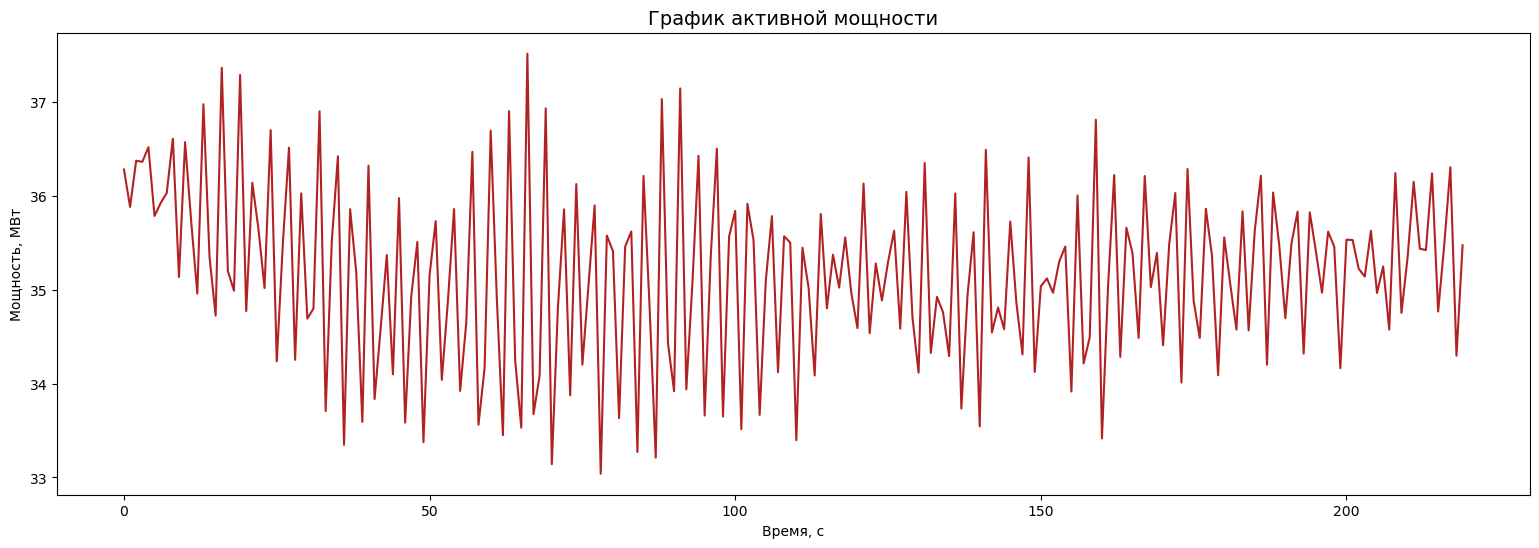

In [4]:
# Активная мощность
plt.title('График активной мощности', fontsize=14)
plt.xlabel('Время, с')
plt.ylabel('Мощность, МВт')
x=df_sk['time']
y=df_main["G1_P"]/1000000
plt.plot(x,y,'firebrick', label='Активная мощность')
plt.show()

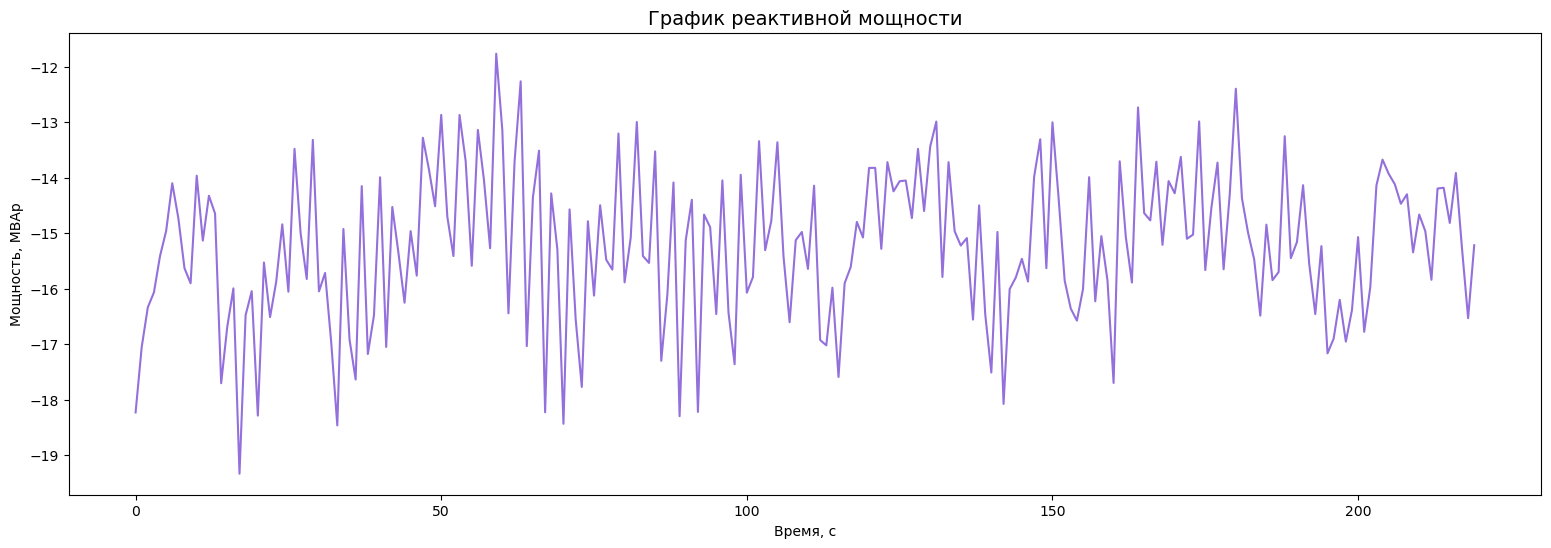

In [5]:
# Реактивная мощность
plt.title('График реактивной мощности', fontsize=14)
plt.xlabel('Время, с')
plt.ylabel('Мощность, МВАр')
x=df_sk['time']
y=df_main["G1_Q"]/1000000
plt.plot(x,y,'mediumpurple', label='Реактивная мощность')
plt.show()

## Анализ результатов СМСР

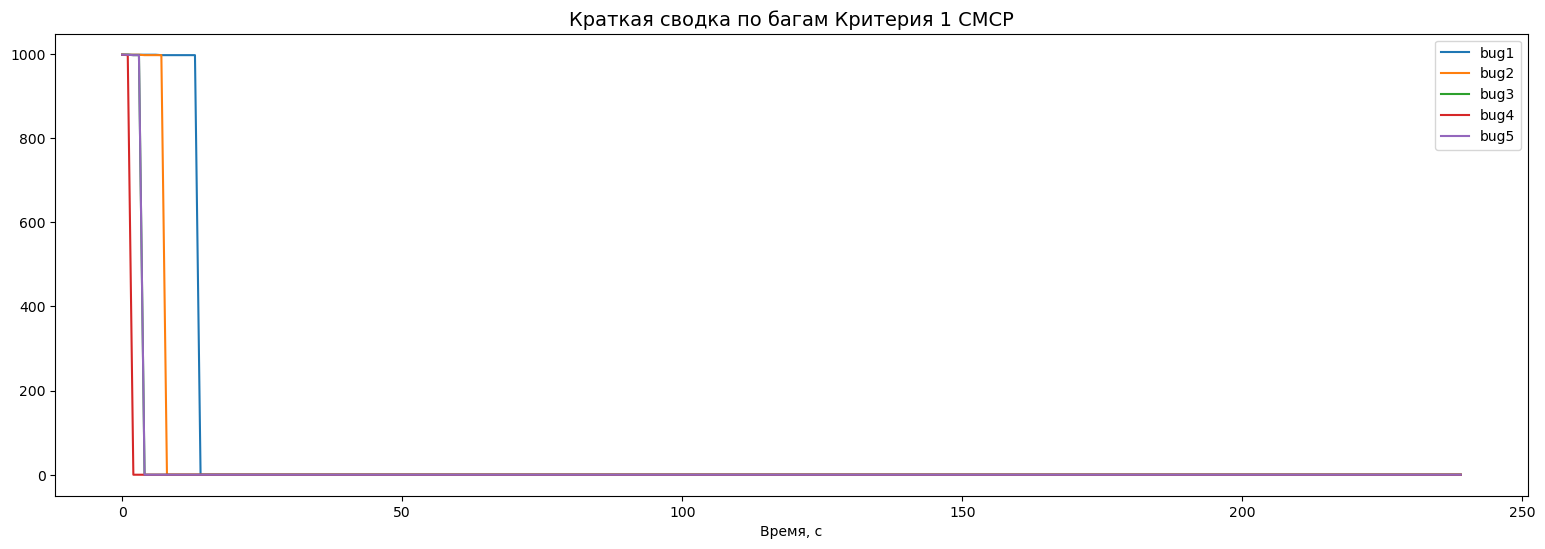

In [6]:
# Краткая сводка по багам Критерия 1
plt.title('Краткая сводка по багам Критерия 1 СМСР', fontsize=14)
plt.xlabel('Время, с')
plt.plot(diagno_SMSR["bug1"], label='bug1')
plt.plot(diagno_SMSR["bug2"], label='bug2')
plt.plot(diagno_SMSR["bug3"], label='bug3')
plt.plot(diagno_SMSR["bug4"], label='bug4')
plt.plot(diagno_SMSR["bug5"], label='bug5')
plt.legend()
plt.show()

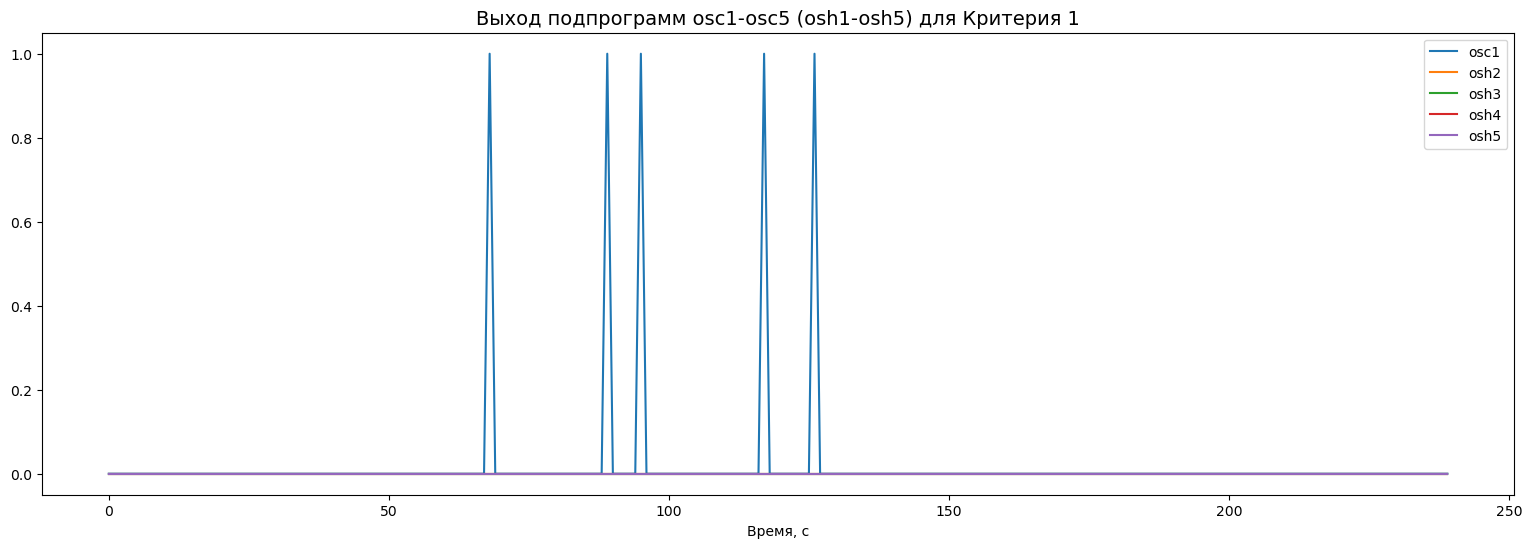

In [7]:
# Выход подпрограмм osc1-osc5 (osh1-osh5) Критерия 1
plt.title('Выход подпрограмм osc1-osc5 (osh1-osh5) для Критерия 1', fontsize=14)
plt.xlabel('Время, с')
plt.plot(osh_SMSR["osc1"], label='osh1')
plt.plot(osh_SMSR["osc2"], label='osh2')
plt.plot(osh_SMSR["osc3"], label='osh3')
plt.plot(osh_SMSR["osc4"], label='osh4')
plt.plot(osh_SMSR["osc5"], label='osh5')
plt.legend()
plt.show()

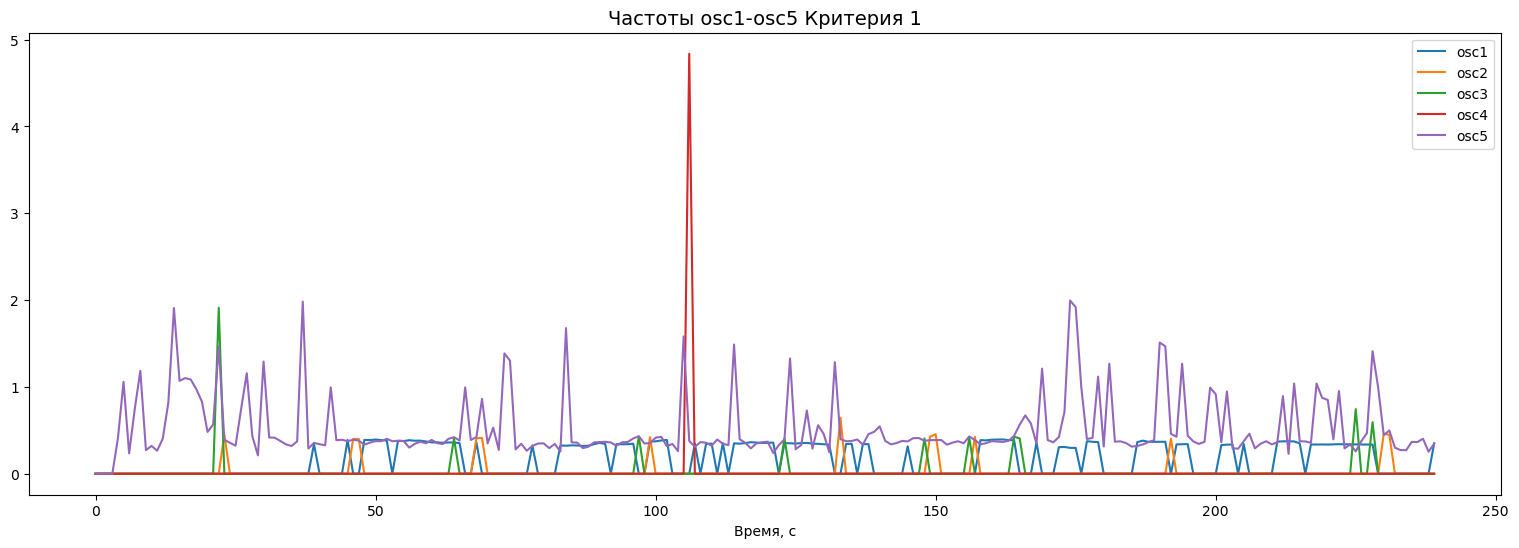

In [8]:
# Частоты osc1-osc5 Критерия 1
plt.title('Частоты osc1-osc5 Критерия 1', fontsize=14)
plt.xlabel('Время, с')
plt.plot(results_SMSR["osc1_f"], label='osc1')
plt.plot(results_SMSR["osc2_f"], label='osc2')
plt.plot(results_SMSR["osc3_f"], label='osc3')
plt.plot(results_SMSR["osc4_f"], label='osc4')
plt.plot(results_SMSR["osc5_f"], label='osc5')
plt.legend()
plt.show()

## Сравнение Поиска СК и СМСР

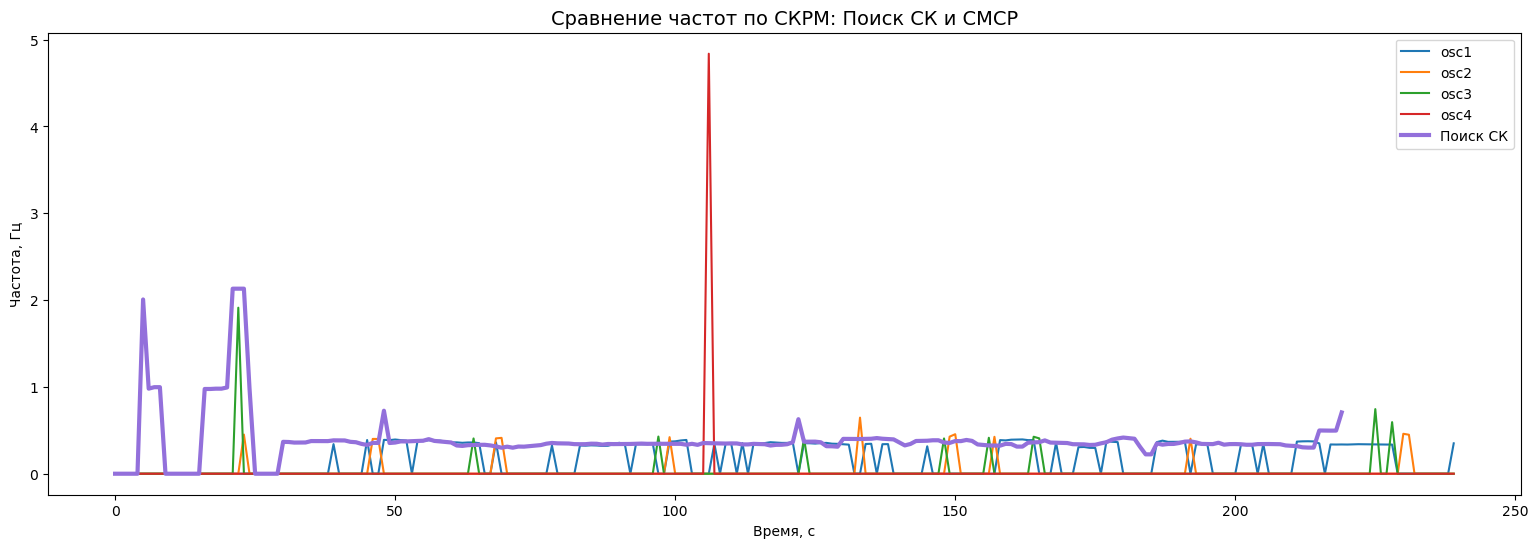

In [17]:
# Поиск СК и СМСР - частота (по реактивной мощности)
x=df_sk["time"]
y1=df_sk["G1_def_Q_freq"]
y1_filled = pd.Series(y1).ffill()
plt.title('Сравнение частот по СКРМ: Поиск СК и СМСР', fontsize=14)
plt.xlabel('Время, с')
plt.ylabel('Частота, Гц')
plt.plot(results_SMSR["osc1_f"], label='osc1')
plt.plot(results_SMSR["osc2_f"], label='osc2')
plt.plot(results_SMSR["osc3_f"], label='osc3')
plt.plot(results_SMSR["osc4_f"], label='osc4')
plt.plot(x, y1_filled,'mediumpurple',linewidth=3, label='Поиск СК')
plt.legend()
plt.show()

### Спектрограмма реактивной мощности

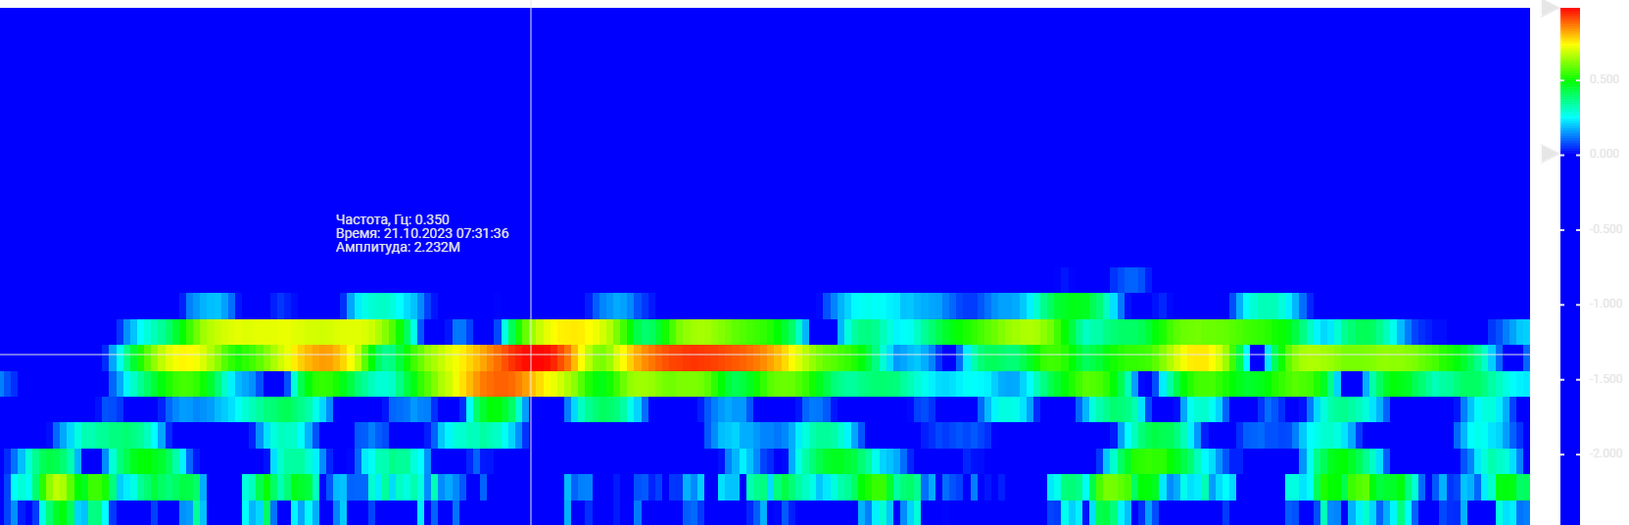

In [10]:
from PIL import Image as PILImage
from IPython.display import display
image = PILImage.open('./Svet1/Q.png')
scale_pics = 0.98*k_scale # масштаб
image_resized = image.resize((int(image.width * scale_pics), int(image.height * scale_pics)), PILImage.Resampling.LANCZOS) # Меняем размер изображения с использованием LANCZOS (сглаживание)
display(image_resized)

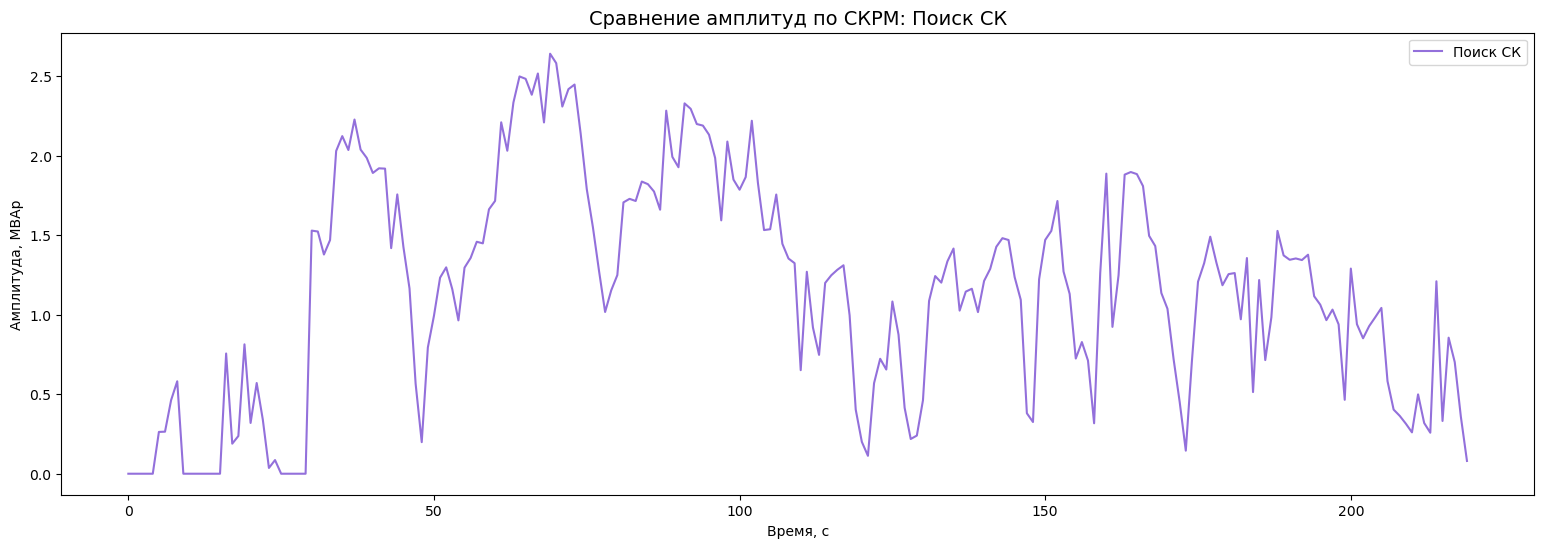

In [11]:
# Поиск СК - амплитуда (по реактивной мощности)
x = df_sk["time"]
y1 = df_sk["G1_def_Q_amp"] / 1000000
y1_filled = pd.Series(y1).ffill()
plt.title('Сравнение амплитуд по СКРМ: Поиск СК', fontsize=14)
plt.xlabel('Время, с')
plt.ylabel('Амплитуда, МВАр')
plt.plot(x, y1_filled, 'mediumpurple', label='Поиск СК')
plt.legend()
plt.show()


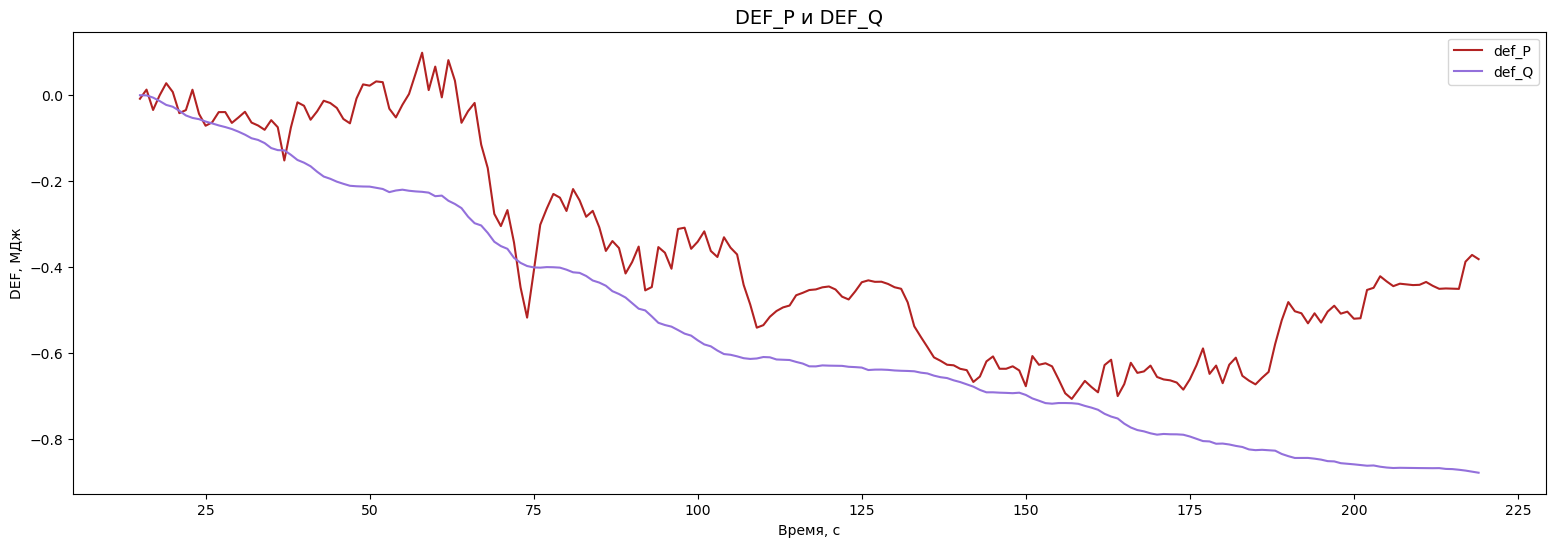

In [12]:
# DEF_P и DEF_Q
x=df_sk["time"]
y1=df_sk["G1_def_P"]/1000000
y2=df_sk["G1_def_Q"]/1000000
plt.title('DEF_P и DEF_Q', fontsize=14)
plt.xlabel('Время, с')
plt.ylabel('DEF, МДж')
plt.plot(x,y1,'firebrick',label='def_P')
plt.plot(y2,'mediumpurple',label='def_Q')
plt.legend()
plt.show()

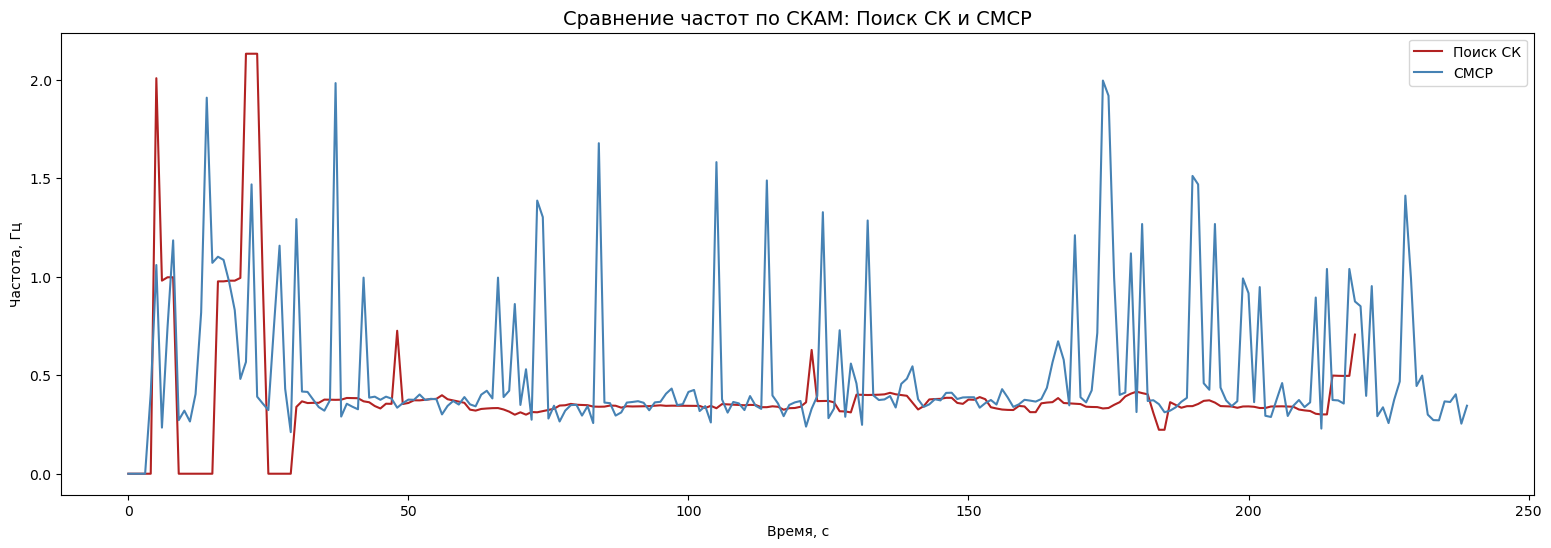

In [13]:
# Поиск СК и СМСР - частота (по активной мощности)
x=df_sk["time"]
y1=df_sk["G1_def_P_freq"]
y1_filled = pd.Series(y1).ffill()
y2=results_SMSR["osc5_f"]
plt.title('Сравнение частот по СКАМ: Поиск СК и СМСР', fontsize=14)
plt.xlabel('Время, с')
plt.ylabel('Частота, Гц')
plt.plot(x,y1_filled,'firebrick', label='Поиск СК')
plt.plot(y2,'steelblue', label='СМСР')
plt.legend()
plt.show()

### Спектрограмма активной мощности

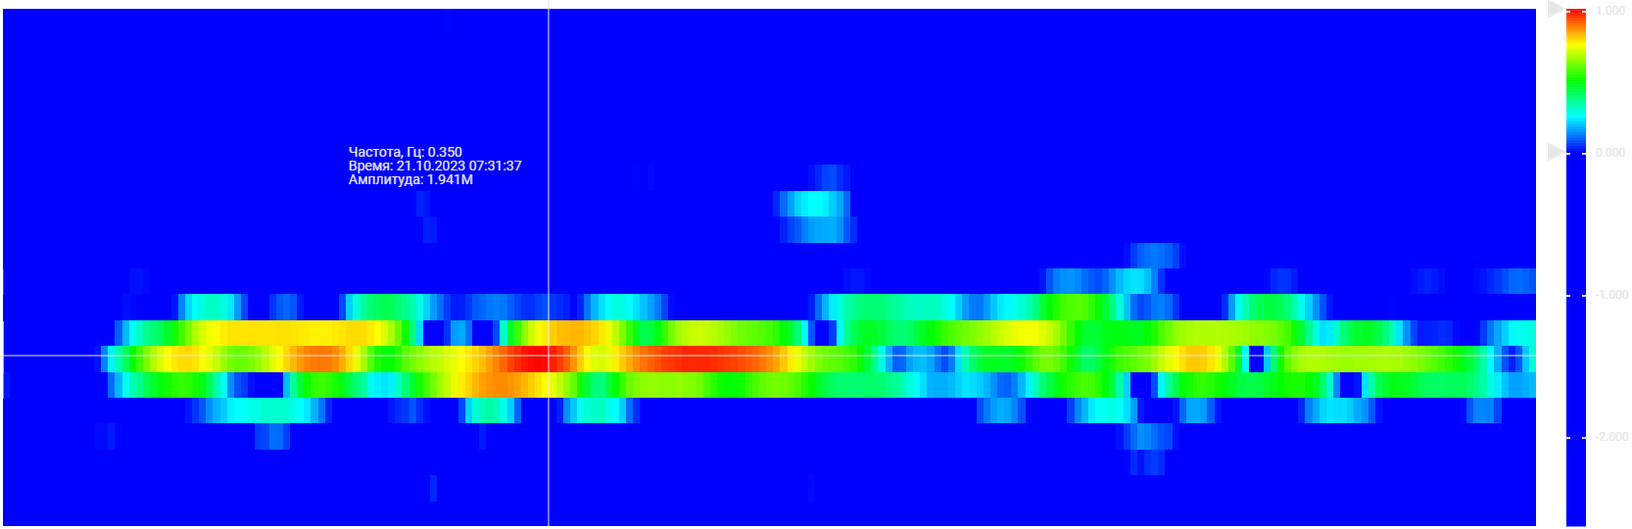

In [14]:
from PIL import Image as PILImage
from IPython.display import display
image = PILImage.open('./Svet1/P.png')
scale_pics = 0.98*k_scale # масштаб
image_resized = image.resize((int(image.width * scale_pics), int(image.height * scale_pics)), PILImage.Resampling.LANCZOS) # Меняем размер изображения с использованием LANCZOS (сглаживание)
display(image_resized)

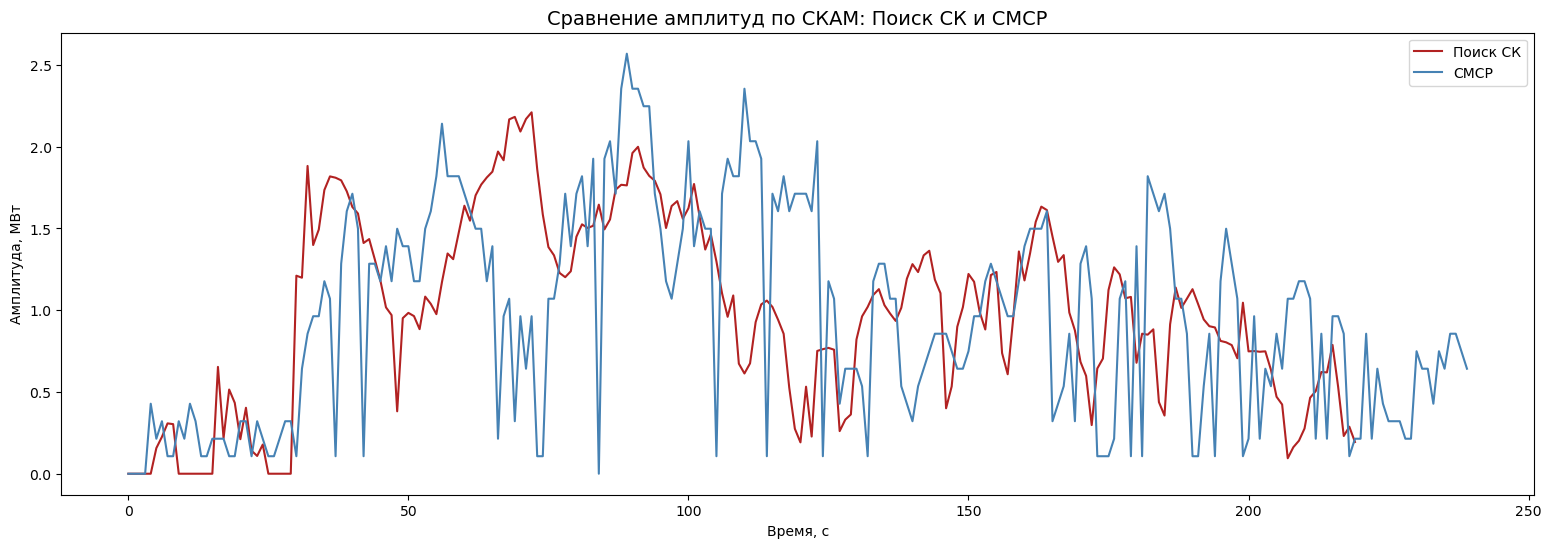

In [15]:
# Поиск СК и СМСР - амплитуда (по активной мощности)
x=df_sk["time"]
y1=df_sk["G1_def_P_amp"]/1000000
y1_filled = pd.Series(y1).ffill()
y2=results_SMSR["osc5_amp"]*Pnom
plt.title('Сравнение амплитуд по СКАМ: Поиск СК и СМСР', fontsize=14)
plt.xlabel('Время, с')
plt.ylabel('Амплитуда, МВт')
plt.plot(x,y1_filled,'firebrick', label='Поиск СК')
plt.plot(y2,'steelblue', label='СМСР')
plt.legend()
plt.show()